# United States Refugee Statistics Exploratory Data Analysis

_Original dataset are downloaded from the [unhcr.org](https://www.unhcr.org/refugee-statistics/download/?url=8tIY7I) website._\
_Credit to & learned from alaa-mohamedahmed

## Questions

1. From which countries has the United States admitted the highest number of refugees?
2. What are the total number of resettled refugees in the United States per year?
3. What are the countries of origin for the majority of asylum claims made in the United States?
4. What is the total number of asylum claims made in the United States every year?
5. What are the general trends in refugee and asylum statistics from 2012-2022?


In [30]:
# !pip install pandas
# !pip install numpy
# !pip install matplotlib
# !pip install seaborn

In [31]:
import numpy as np
import pandas as pd
%pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pyodide_js
await pyodide_js.loadPackage('jinja2')


In [32]:
data = pd.read_csv("/drive/notebooks/usa-refugee-data_2012-2022.csv")

In [33]:
data.head()

,Year,Country-of-origin,UNHCR-Refugees,Asylum-seekers,Total
0,2012,Afghanistan,1017,130,1147
1,2012,Albania,4422,38,4460
2,2012,Algeria,216,6,222
3,2012,Andorra,6,0,6
4,2012,Angola,134,17,151


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1974 entries, 0 to 1973
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Year               1974 non-null   int64 
 1   Country-of-origin  1974 non-null   object
 2   UNHCR-Refugees     1974 non-null   int64 
 3   Asylum-seekers     1974 non-null   int64 
 4   Total              1974 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 69.5+ KB


In [35]:
# checking mising values 
pd.DataFrame(data.isnull().sum(), columns=['Missing Values'])

,Missing Values
Year,0
Country-of-origin,0
UNHCR-Refugees,0
Asylum-seekers,0
Total,0


**Question 1**

In [36]:
top_unhcr_refugees = data.groupby('Country-of-origin')['UNHCR-Refugees'].sum().reset_index(name='UNHCR-Refugees').sort_values(by='UNHCR-Refugees', ascending=False).head(10)

top_unhcr_refugees.reset_index(drop=True).style.bar()

,Country-of-origin,UNHCR-Refugees
0,China,783491
1,Haiti,210205
2,El Salvador,202809
3,Guatemala,160903
4,Egypt,128283
5,Venezuela (Bolivarian Republic of),123533
6,Honduras,108842
7,Ethiopia,104412
8,Mexico,86245
9,Colombia,74778


<ipython-input-37-17542463abd0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_unhcr_refugees, x='Country-of-origin', y='UNHCR-Refugees', palette='mako')


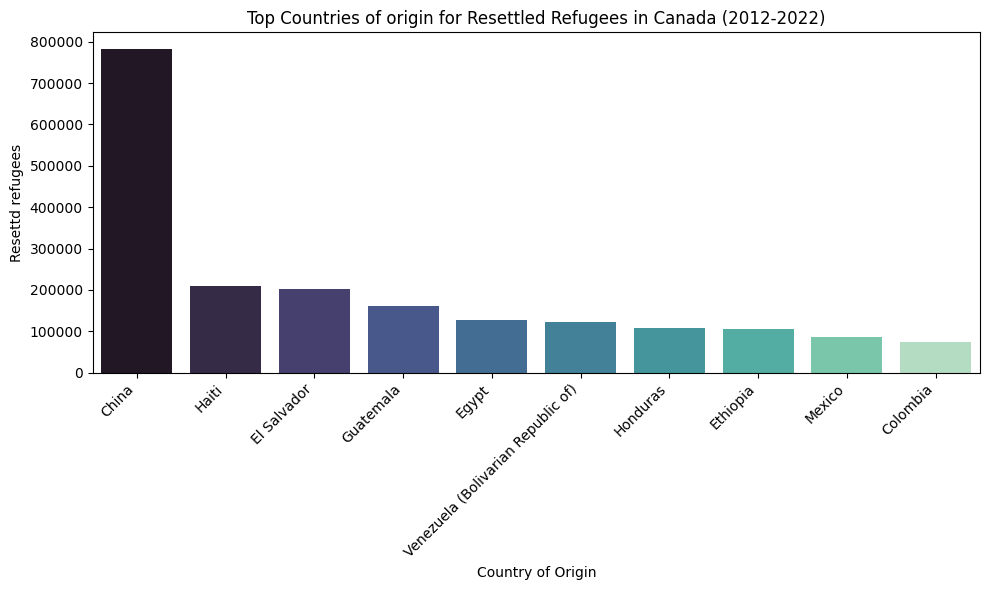

In [37]:
plt.figure(figsize=(10,6))
sns.barplot(data=top_unhcr_refugees, x='Country-of-origin', y='UNHCR-Refugees', palette='mako')
plt.xlabel('Country of Origin')
plt.ylabel('Resettd refugees')
plt.title('Top Countries of origin for Resettled Refugees in Canada (2012-2022)')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

**Question 2**

In [38]:
total_refugees_yrly = data.groupby('Year')['UNHCR-Refugees'].sum().reset_index(name='UNHCR-Refugees').sort_values(by='Year')

total_refugees_yrly.reset_index(drop=True)

,Year,UNHCR-Refugees
0,2012,262006
1,2013,263653
2,2014,267214
3,2015,273198
4,2016,272963
5,2017,287135
6,2018,313242
7,2019,341715
8,2020,340846
9,2021,339179


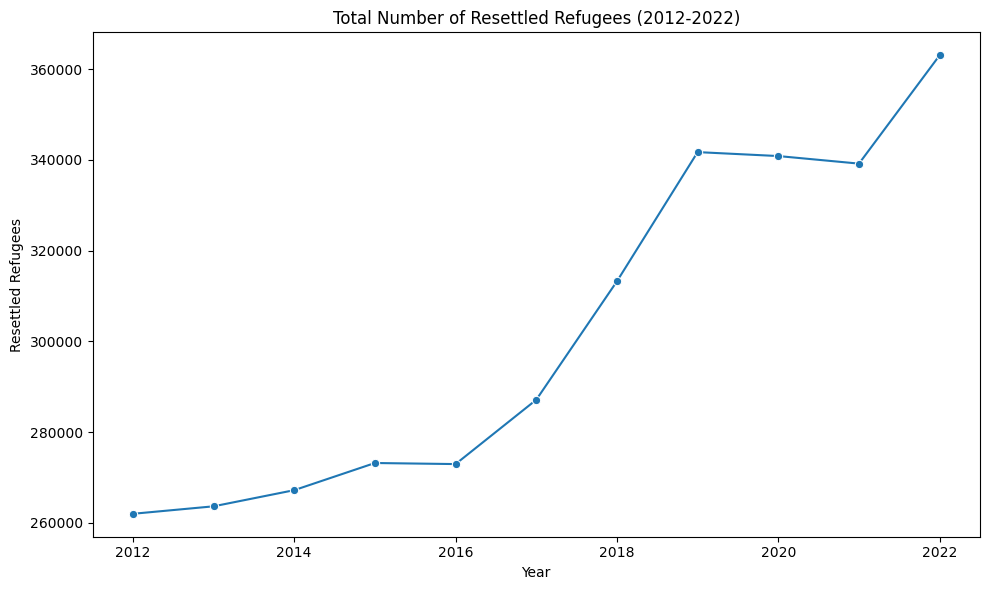

In [39]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=total_refugees_yrly, x='Year', y='UNHCR-Refugees', marker='o')
plt.xlabel('Year')
plt.ylabel('Resettled Refugees')
plt.title('Total Number of Resettled Refugees (2012-2022)')

plt.tight_layout()
plt.show()

**Question 3**

In [40]:
top_asylum_seekers = data.groupby('Country-of-origin')['Asylum-seekers'].sum().reset_index(name='Asylum-seekers').sort_values(by='Asylum-seekers', ascending=False).head(10)

top_asylum_seekers.reset_index(drop=True).style.bar()

,Country-of-origin,Asylum-seekers
0,Venezuela (Bolivarian Republic of),1038792
1,Guatemala,816988
2,El Salvador,797826
3,Mexico,738321
4,China,614881
5,Honduras,604098
6,India,270000
7,Haiti,209217
8,Cuba,205899
9,Ecuador,170212


<ipython-input-41-67236f51cd72>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_asylum_seekers, x='Country-of-origin', y='Asylum-seekers', palette='mako')


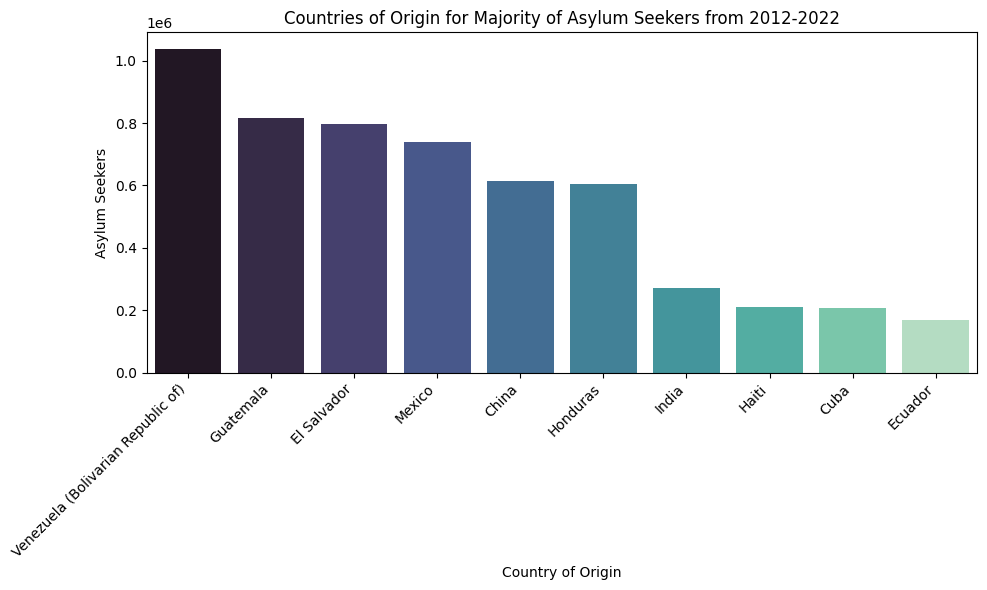

In [41]:
plt.figure(figsize=(10,6))
sns.barplot(data=top_asylum_seekers, x='Country-of-origin', y='Asylum-seekers', palette='mako')
plt.xlabel('Country of Origin')
plt.ylabel('Asylum Seekers')
plt.title('Countries of Origin for Majority of Asylum Seekers from 2012-2022')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

**Question 4**

In [42]:
asylum_seekers_yrly = data.groupby('Year')['Asylum-seekers'].sum().reset_index(name='Asylum-seekers').sort_values(by='Year')

asylum_seekers_yrly.reset_index(drop=True)

,Year,Asylum-seekers
0,2012,18946
1,2013,84317
2,2014,187815
3,2015,286177
4,2016,439864
5,2017,642719
6,2018,718992
7,2019,847608
8,2020,997996
9,2021,1303181


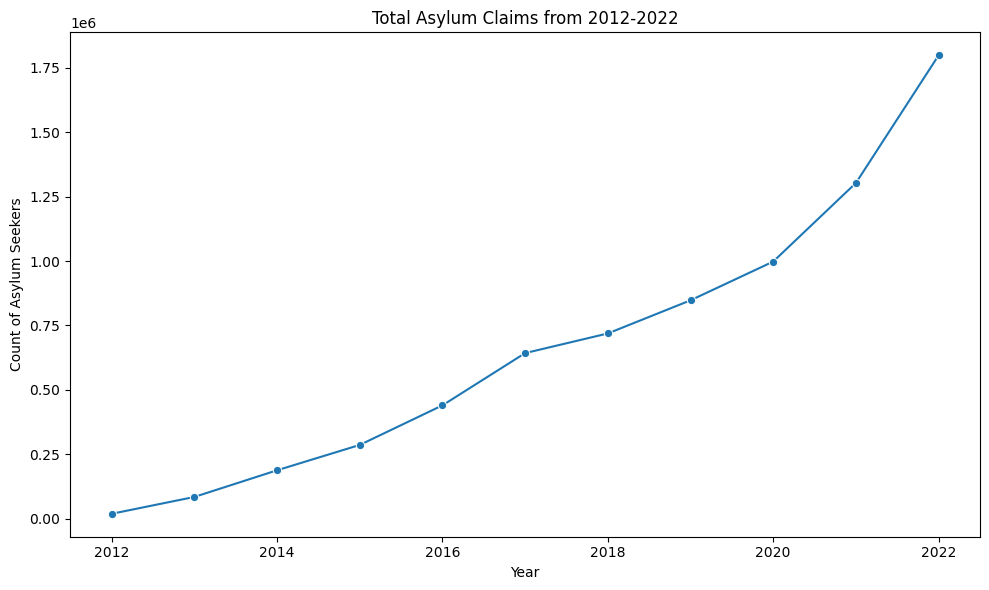

In [43]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=asylum_seekers_yrly, x='Year', y='Asylum-seekers',marker='o')
plt.xlabel('Year')
plt.ylabel('Count of Asylum Seekers')
plt.title('Total Asylum Claims from 2012-2022')

plt.tight_layout()
plt.show()

**Question 5**

In [44]:
top_countries = data.groupby('Country-of-origin')['Total'].sum().reset_index(name='Total').sort_values(by ='Total', ascending=False).head(10)

top_countries.reset_index(drop=True).style.bar()

,Country-of-origin,Total
0,China,1398372
1,Venezuela (Bolivarian Republic of),1162325
2,El Salvador,1000635
3,Guatemala,977891
4,Mexico,824566
5,Honduras,712940
6,Haiti,419422
7,India,341879
8,Colombia,236478
9,Cuba,219691


<ipython-input-45-092925f92587>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_countries, x='Country-of-origin', y='Total', palette='mako')


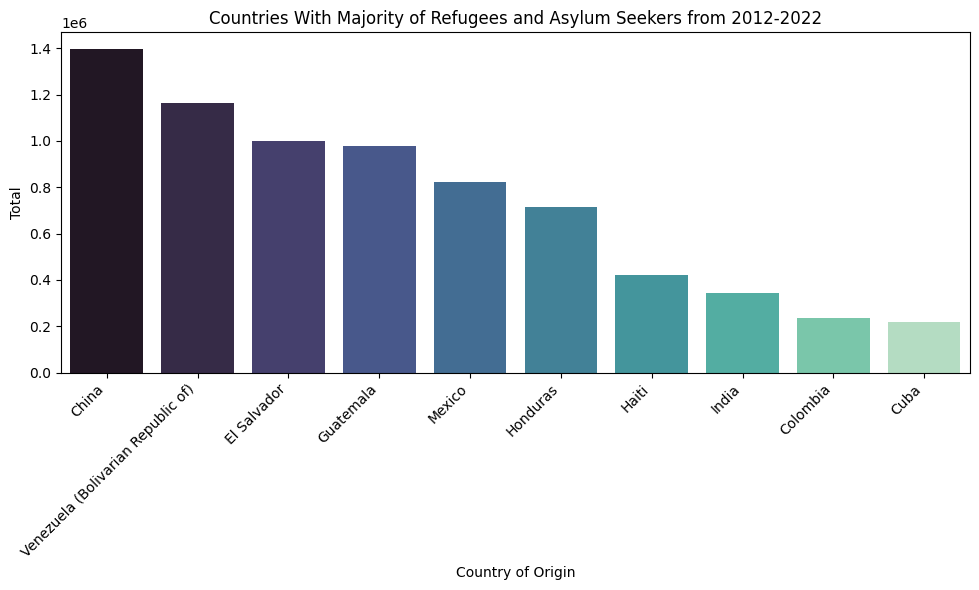

In [45]:
plt.figure(figsize=(10,6))
sns.barplot(data=top_countries, x='Country-of-origin', y='Total', palette='mako')
plt.xlabel('Country of Origin')
plt.ylabel('Total')
plt.title('Countries With Majority of Refugees and Asylum Seekers from 2012-2022')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

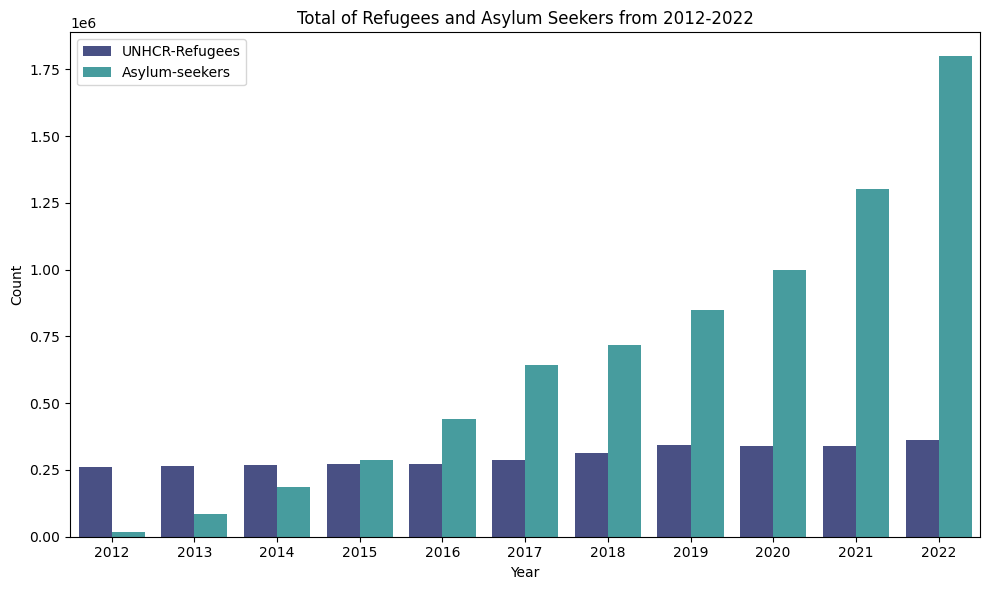

In [46]:
yearly_counts = data.groupby('Year')[['UNHCR-Refugees', 'Asylum-seekers']].sum().reset_index()

melted_data = pd.melt(yearly_counts, id_vars=['Year'], var_name='Category', value_name='Count')

plt.figure(figsize=(10, 6))
sns.barplot(data=melted_data, x='Year', y='Count', hue='Category', palette='mako')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Total of Refugees and Asylum Seekers from 2012-2022')
plt.legend()

plt.tight_layout()
plt.show()

## 2012- 2022 The United States Refugee Statistics EDA Results Summary

1. **Countries From Which United States Has Admitted Highest Number of Refugees:**
    - China (783,491)
    - Haiti (210,205)
    - El Salvador (202,809)
    - Guatemala (160,903)
    - Egypt (128,283)
    
2. **Total Number of Resettled Refugees in United States Per Year:**
    - 2012: 262,006
    - 2013: 263,653
    - 2014: 267,214
    - 2015: 273,198
    - 2016: 272,963
    - 2017: 287,135
    - 2018: 313,242
    - 2019: 341,715
    - 2020: 340,846
    - 2021: 339,179
    - 2022: 363,059
    
3. **Countries of Origin for Majority of Asylum Claims Made in the United States:**
    - Venezuela (1,038,792)
    - Guatemala (816,988)
    - El Salvador (797,826)
    - Mexico (738,321)
    - Chiba (614,881)
    
4. **Total Number of Asylum Claims Made in the United States Every Year:**
    - 2012: 18,946
    - 2013: 84,317
    - 2014: 187,815
    - 2015: 286,177
    - 2016: 439,864
    - 2017: 642,719
    - 2018: 718,992
    - 2019: 847,608
    - 2020: 997,996
    - 2021: 1,303,181
    - 2022: 1,798,792
    
5. **General Trends in Refugee and Asylum Statistics from 2012-2022:**
    - 2022 was the year where the United States admitted the highest number of refugees, followed by 2019, 2020, and 2021.
    - 2012 had the lowest number of resettled refugees
    - 2022 had the highest number of asylum claims made in the United States, followed by 2021 and 2020
    - 2012 had the lowest number of asylum claims, followed by 2013 and 2014